# CIFAR-10 dataset:

<img src="./pictures/cifar_10_data_set_01.png"
     style="float: left; margin-right: 10px; width: 500px"/>

In [1]:
# basic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tensorflow:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
# loading dataset:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# shape of our data:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


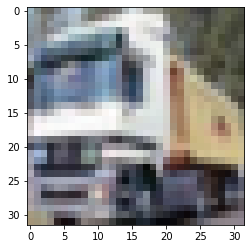

In [4]:
# image:
image_test_01 = x_train[1]
plt.imshow(image_test_01)
plt.show()

In [5]:
# normalizing / one_hot_encoding: (preprocessing)
x_train = x_train / 255
x_test = x_test / 255

# one_hot_encoding:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [6]:
print("y_train_cat shape: ", y_train_cat.shape)

y_train_cat shape:  (50000, 10)


In [7]:
# creating our model:
cnn_model = Sequential()
# Conv2D:(1)
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(4,4),
                     strides=(1,1),
                     padding="valid",
                     activation="relu",
                     input_shape=(32, 32, 3)))
# MaxPool:(2)
cnn_model.add(MaxPool2D(pool_size=(2,2)))

# Conv2D:(3)
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(4,4),
                     strides=(1,1),
                     padding="valid",
                     activation="relu",
                     input_shape=(32, 32, 3)))
# MaxPool:(4)
cnn_model.add(MaxPool2D(pool_size=(2,2)))

# flatten:
cnn_model.add(Flatten())
# Dense:
cnn_model.add(Dense(256, activation="relu"))

# output:
cnn_model.add(Dense(10, activation="softmax"))

# compiling the model:
cnn_model.compile(optimizer="adam",
                  loss="categorical_crossentropy", 
                  metrics="accuracy")

In [8]:
# summary of the model:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [9]:
# adding early stopping to the model:
call_back = EarlyStopping(monitor="val_loss", patience=1)

In [10]:
# fitting the model:
cnn_model.fit(x_train,
              y_train_cat,
              validation_data=(x_test, y_test_cat),
              epochs=15,
              batch_size=128,
              callbacks=call_back)

Epoch 1/15
391/391 [==============================] - 247s 626ms/step - loss: 1.6245 - accuracy: 0.4138 - val_loss: 1.3827 - val_accuracy: 0.5090
Epoch 2/15
391/391 [==============================] - 245s 628ms/step - loss: 1.3214 - accuracy: 0.5322 - val_loss: 1.2306 - val_accuracy: 0.5623
Epoch 3/15
391/391 [==============================] - 244s 623ms/step - loss: 1.1951 - accuracy: 0.5798 - val_loss: 1.1844 - val_accuracy: 0.5823
Epoch 4/15
391/391 [==============================] - 245s 627ms/step - loss: 1.0970 - accuracy: 0.6127 - val_loss: 1.0831 - val_accuracy: 0.6160
Epoch 5/15
391/391 [==============================] - 244s 624ms/step - loss: 1.0180 - accuracy: 0.6422 - val_loss: 1.0604 - val_accuracy: 0.6298
Epoch 6/15
391/391 [==============================] - 244s 625ms/step - loss: 0.9438 - accuracy: 0.6700 - val_loss: 1.0460 - val_accuracy: 0.6346
Epoch 7/15
391/391 [==============================] - 244s 625ms/step - loss: 0.8910 - accuracy: 0.6901 - val_loss: 0.9773 -

In [13]:
# saving the model:
cnn_model.save(".\saved model\cifar_10_predictor.h5")

In [18]:
# plotting (loss, val_loss) ||| plotting (accuracy, val_accuracy)
metrics = pd.DataFrame(data=cnn_model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.624544,0.41380,1.382705,0.5090
1,1.321375,0.53220,1.230563,0.5623
2,1.195095,0.57982,1.184425,0.5823
3,1.097044,0.61272,1.083073,0.6160
4,1.017964,0.64222,1.060377,0.6298
5,0.943833,0.67000,1.045989,0.6346
6,0.891023,0.69006,0.977343,0.6601
7,0.831850,0.70968,0.989995,0.6589


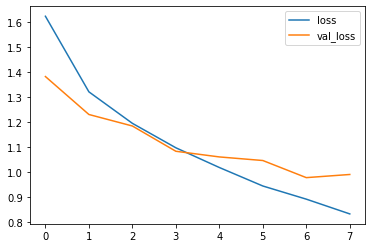

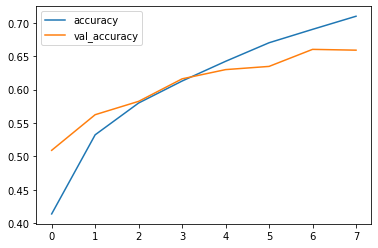

In [20]:
# plotting (loss, val_loss) ||| plotting (accuracy, val_accuracy)
metrics[["loss", "val_loss"]].plot()
metrics[["accuracy", "val_accuracy"]].plot()
plt.show()

In [21]:
# evaluation of the model:
cnn_model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 21s 68ms/step - loss: 0.9900 - accuracy: 0.6589


[0.9899942278862, 0.6589000225067139]

In [ ]:
# evaluation of the model by metrics: